In [ ]:
import os
os.environ["OPENCV_DISABLE_OPENMP"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "../data/raw"
SAVE_PATH = "../data/preprocessed"
IMG_SIZE = 224
CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

os.makedirs(SAVE_PATH, exist_ok=True)

In [3]:
data, labels = [], []

for idx, label in enumerate(CLASSES):
    folder = os.path.join(DATASET_PATH, label)
    if not os.path.isdir(folder):
        print(f"⚠️ Folder missing: {folder}")
        continue
    
    for file in tqdm(os.listdir(folder), desc=f"Loading {label}"):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(idx)

data = np.array(data, dtype=np.float32)
labels = np.array(labels)

print(f"✅ Loaded {len(data)} images total.")

Loading trash: 100%|██████████| 137/137 [00:00<00:00, 759.64it/s]


✅ Loaded 2527 images total.


In [4]:
# normalize and one-hot encode
data = data / 255.0
labels = to_categorical(labels, num_classes=len(CLASSES))

# split
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.3, random_state=42, stratify=labels
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (1768, 224, 224, 3), Val: (379, 224, 224, 3), Test: (380, 224, 224, 3)


In [5]:
np.save(os.path.join(SAVE_PATH, "X_train.npy"), X_train)
np.save(os.path.join(SAVE_PATH, "y_train.npy"), y_train)
np.save(os.path.join(SAVE_PATH, "X_val.npy"), X_val)
np.save(os.path.join(SAVE_PATH, "y_val.npy"), y_val)
np.save(os.path.join(SAVE_PATH, "X_test.npy"), X_test)
np.save(os.path.join(SAVE_PATH, "y_test.npy"), y_test)

print(f"💾 Preprocessed data saved to {SAVE_PATH}")

💾 Preprocessed data saved to ../data/preprocessed


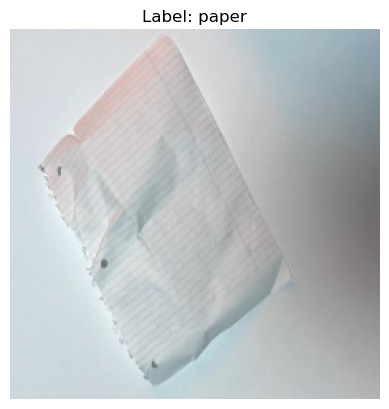

In [6]:
i = np.random.randint(len(X_train))
plt.imshow(X_train[i])
plt.title(f"Label: {CLASSES[np.argmax(y_train[i])]}")
plt.axis("off")
plt.show()